# Solving Gravitational Potential of Spherically Symmetric Star

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from multigrid import BVP, BVPSolver

## Relaxation and Residual for the Differential Operator

In [2]:
def relax_left(sol, src, s, h):
    return sol[1] - src[0]*h**2/6

def relax_middle(sol, src, s, h, i):
    return (
        + sol[i + 1]*(1 + h/s)
        + sol[i - 1]*(1 - h/s)
        - src[i]*h**2
    )/2

def relax_right(sol, src, s, h):
    return 0

def residual_left(sol, src, s, h):
    return -(relax_left(sol, src, s, h) - sol[0])*6/h**2

def residual_middle(sol, src, s, h, i):
    return -(relax_middle(sol, src, s, h, i) - sol[i])*2/h**2

def residual_right(sol, src, s, h):
    return 0

## Functions for the Source and the Exact Solution

In [3]:
rho_c = 1.28e-3
N = 1
K = 100
alpha_sq = (N + 1)*K*rho_c**(1/N  - 1)/(4*np.pi)
r_s_sq = np.pi**2*alpha_sq

def src(s):
    if s < 0.5:
        rho = rho_c*np.sinc(s/(1 - s))
        return 4*np.pi*rho*r_s_sq/(1 - s)**4
    else:
        return 0

def exact_sol(s):
    if s < 0.5:
        factor = 1 + np.sinc(s/(1 - s))
    else:
        factor = (1 - s)/s
    return -4*np.pi*rho_c*alpha_sq*factor

## Define Boundary Value Problem

In [4]:
s1 = 0
s2 = 1
bvp = BVP((s1, s2), relax_left, relax_middle, relax_right, residual_left, residual_middle, residual_right, src, exact_sol_func=exact_sol)

## Set Multigrid Solver

In [5]:
n = 16
solver = BVPSolver(bvp, n, num_iter=(4,1,4))

## Solving

In [6]:
number_of_iter = 10
start = time.time()
for i in range(number_of_iter):
    solver.solve()
    res_rms = solver.residual().rms()
    print(i, res_rms/2**n, solver.exact_error().rms())
print("time : {} s".format((time.time() - start)/number_of_iter))

0 3.561445406003263e-06 0.012873537244631226
1 2.0892634729372169e-07 0.00048814595042558735
2 1.4498042973508759e-08 1.8266111641201493e-05
3 1.0447766459422925e-09 6.848598709514409e-07
4 7.140074277539586e-11 2.5021106020856238e-08
5 4.8348508670143885e-12 1.806073643239264e-09
6 1.3826137147955577e-12 1.3053887932481263e-09
7 9.819574883223643e-13 1.1781972239580108e-09
8 9.349359594100613e-13 1.1363148002269608e-09
9 8.543241430906275e-13 1.1294324758311582e-09
time : 1.9284177780151368 s


## Plot Solution

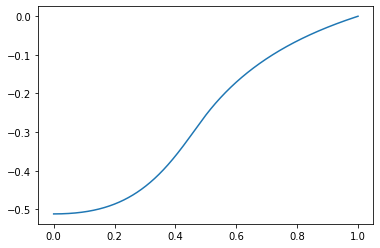

In [7]:
plt.plot(solver.sol_grid.x, solver.sol_grid.val)